# Bayesian test Mrk335(18)

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import basinhopping
from iminuit import Minuit

import emcee
from pprint import pprint
import time
from multiprocessing import Pool

import random

In [3]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood(log_A,log_f_b,alpha_H,poisson):
    alpha_L = 1.0
    
    perdata18 = pd.read_csv("perlist18.csv")
    f = perdata18['f']
    per = perdata18['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+poisson)
     
    
    length = len(perdata18)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [7]:
m=Minuit(twi_minus_loglikelihood,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,poisson=0.8,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.01,error_poisson=0.01,
         limit_log_A=(-5,-1), limit_log_f_b=(-5,-1),limit_alpha_H=(2.0,7.0),limit_poisson=(0,5),
         errordef=1)

m.migrad()

pprint(m.fval)

FCN = 4158.28979154928 
 TOTAL NCALL = 191 
 NCALLS = 191 
 
 
 EDM = 0.00021316122282715025 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-4.70169,0.50761,,,-5,-1,No
1,log_f_b,-1.01351,3.30109,,,-5,-1,No
2,alpha_H,6.39157,4.58253,,,2,7,No
3,poisson,3.1733,0.103593,,,0,5,No


4158.28979154928


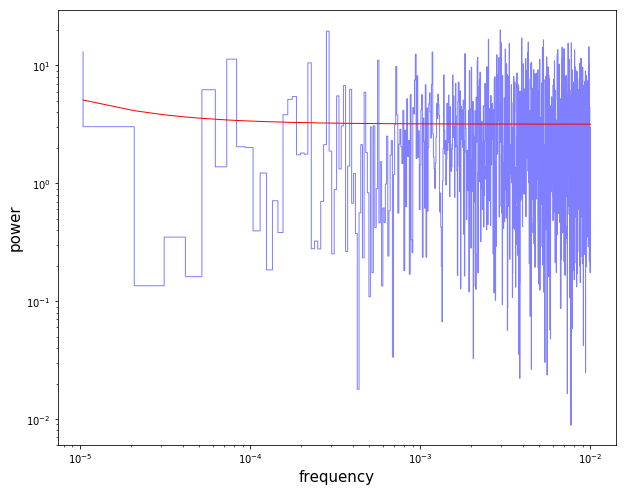

In [8]:
perdata18 = pd.read_csv("perlist18.csv")
f = perdata18['f']
per = perdata18['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,poisson = m.values[0],m.values[1],m.values[2],m.values[3]

model = []
R_obs = []
T_SSE_obs = 0
f_length = len(f)
for i in range(f_length):
    model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+poisson)
    R_obs.append(2*per[i]/model[i])
    T_SSE_obs += (((per[i]-model[i])/model[i])**2)
    
plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f, per, color="b", alpha=0.5, linewidth=1)
plt.plot(f, model, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.show()